In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas

data = pandas.read_csv('results_ubuntu14.04LTS_py3.4.3_anaconda2.3.0_laptop.csv', delimiter=',')
data.columns = ['function', 'size', 'cols', 'time']


In [2]:
data[:19].describe

<bound method DataFrame.describe of                               function  size  cols      time
0                          simple_read     1     5  0.000729
1               naive_read_split_split     1     5  0.007550
2                  for_line_in_f_split     1     5  0.008100
3             for_line_in_f_split_with     1     5  0.008175
4                   pandas_read_csv_df     1     5  0.010363
5             pandas_read_csv_iterrows     1     5  0.468545
6             fileinput_with_firstline     1     5  0.022614
7                           csv_reader     1     5  0.017964
8                      csv_dict_reader     1     5  0.053676
9                           mmap_while     1     5  0.014912
10                            mmap_for     1     5  0.015031
11                       numpy_loadtxt     1     5  0.094875
12                    numpy_genfromtxt     1     5  0.102993
13             numpy_genfromtxt_nditer     1     5  0.112323
14        numpy_genfromtxt_range_shape     1     

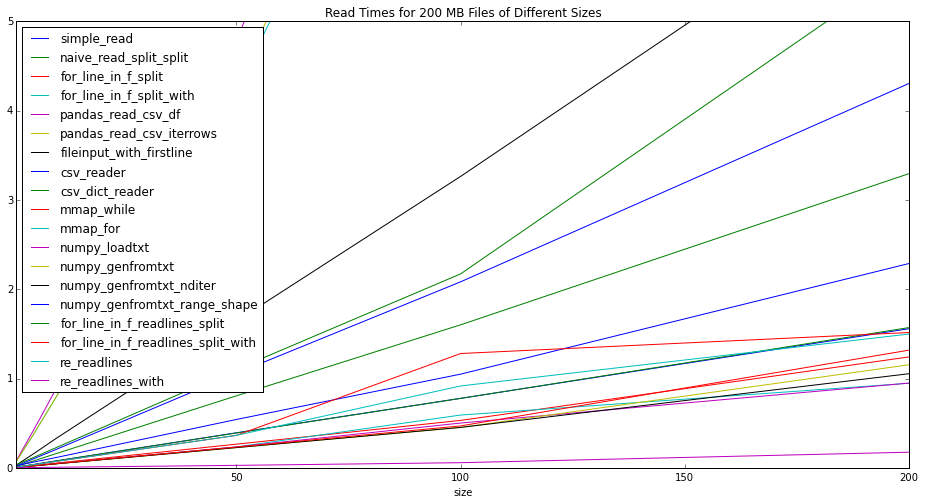

In [13]:
# Let's just make a quick extremum plot of file size vs read time

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
data[data['cols'] == 200].groupby('function').plot(x='size', y='time', ax=ax)
plt.legend(data['function'], loc='upper left')
plt.ylim((0, 5))
plt.title('Read Times for 200 MB Files of Different Sizes')

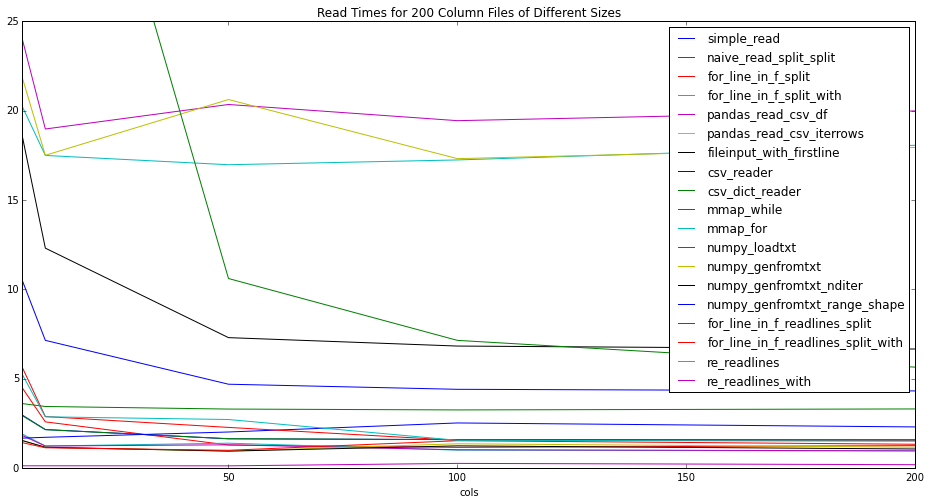

In [18]:
# now let's plot # of columns vs read time

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
data[data['size'] == 200].groupby('function').plot(x='cols', y='time', ax=ax)
plt.legend(data['function'], loc='upper right')
plt.ylim((0, 25))
plt.title('Read Times for 200 Column Files of Different Sizes')

In [10]:
data[data['cols'] == 200][data['size'] == 200].sort('time')

/home/jstilley/anaconda3/lib/python3.4/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,function,size,cols,time
551,simple_read,200,200,0.174799
566,for_line_in_f_readlines_split,200,200,0.947235
567,for_line_in_f_readlines_split_with,200,200,0.949191
554,for_line_in_f_split_with,200,200,1.054141
553,for_line_in_f_split,200,200,1.154243
557,fileinput_with_firstline,200,200,1.242460
552,naive_read_split_split,200,200,1.318512
569,re_readlines_with,200,200,1.498748
568,re_readlines,200,200,1.515388
561,mmap_for,200,200,1.558482


In [11]:
data[data['cols'] == 5][data['size'] == 200].sort('time')

/home/jstilley/anaconda3/lib/python3.4/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,function,size,cols,time
95,simple_read,200,5,0.111992
96,naive_read_split_split,200,5,1.406370
98,for_line_in_f_split_with,200,5,1.523781
97,for_line_in_f_split,200,5,1.526934
99,pandas_read_csv_df,200,5,1.662912
111,for_line_in_f_readlines_split_with,200,5,1.803978
110,for_line_in_f_readlines_split,200,5,1.890794
104,mmap_while,200,5,2.914811
105,mmap_for,200,5,2.946188
102,csv_reader,200,5,3.594512


/home/jstilley/anaconda3/lib/python3.4/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


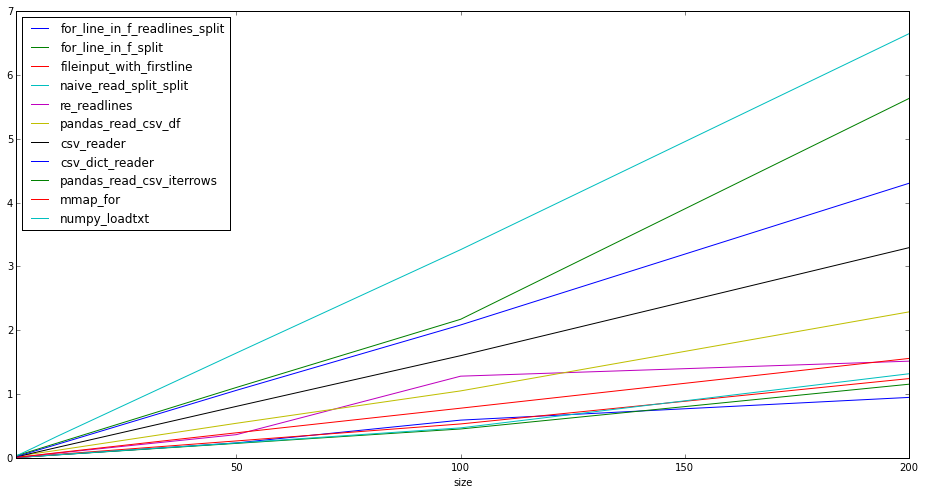

In [29]:
''' Let's ignore several of the really slow functions (like genfromtxt),
    and and the duplicates (like the extra "with" versions).
'''

FUNCTS = ['for_line_in_f_readlines_split', 'for_line_in_f_split', 'fileinput_with_firstline', 
          'naive_read_split_split', 're_readlines', 'pandas_read_csv_df', 'csv_reader', 
          'csv_dict_reader', 'pandas_read_csv_iterrows', 'mmap_for', 'numpy_loadtxt']

# Let's just make a quick extremum plot for only the functions that are doing well.

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
for f in FUNCTS:
    data[data['cols'] == 200][data['function'] == f].groupby('function').plot(x='size', y='time', ax=ax, label=f)
    #plt.legend(data['function'], loc='upper left')
    #break


#data[data['cols'] == 200][data['function'].isin(FUNCTS)].groupby('function').plot(x='size', y='time', ax=ax)
#plt.legend(data['function'], loc='upper left')
#plt.ylim((0, 5))
#plt.title('Read Times for 200 MB Files of Different Sizes')